In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split as tts

In [4]:
df = pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [6]:
df['Department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [8]:
departments = df.groupby('Department')

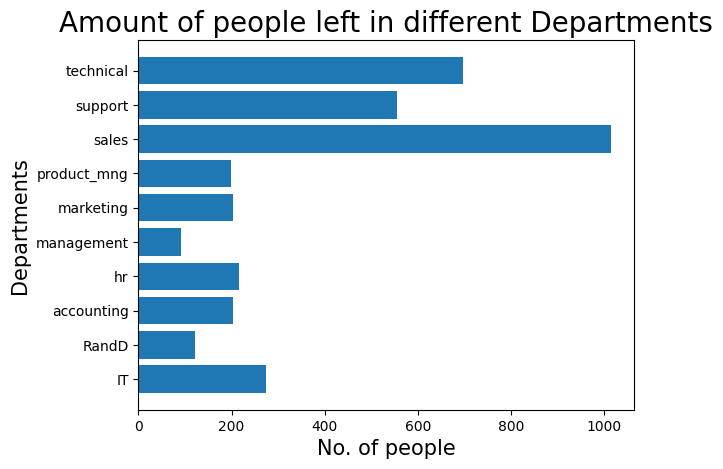

In [131]:
plt.barh(y = departments['left'].sum().index, width = departments['left'].sum().values)
plt.ylabel('Departments', fontsize = 15)
plt.xlabel('No. of people', fontsize = 15)
plt.title('Amount of people left in different Departments', fontsize = 20)
plt.show()

In [43]:
workaccidents = df.groupby(df['Work_accident'])

In [168]:
data = workaccidents['left'].sum() / len(df[df['left'] == 1])

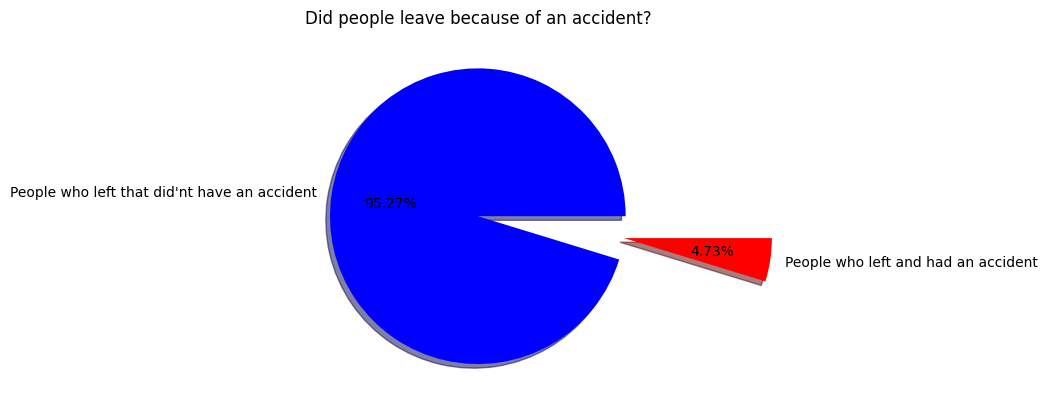

In [170]:
plt.pie(
    data, 
    labels = ["People who left that did'nt have an accident", 'People who left and had an accident'], 
    autopct='%1.2f%%',
    explode = [0, 1],
    shadow = True,
    colors = ['blue', 'Red']
)
plt.title('Did people leave because of an accident?')
plt.show()

In [75]:
timehours = df.groupby(df['time_spend_company'])

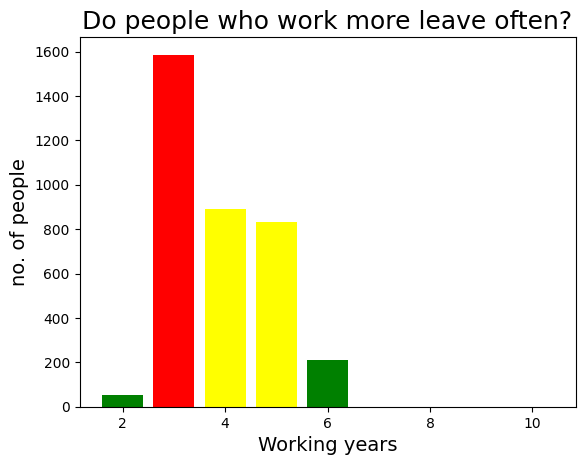

In [84]:
plt.bar(x = timehours['left'].sum().index, height = timehours['left'].sum().values, 
        color = ['green', 'red', 'yellow', 'yellow'])
plt.xlabel('Working years', fontsize = 14)
plt.ylabel('no. of people', fontsize = 14)
plt.title('Do people who worked for longer left often?', fontsize = 18)
plt.show()

In [88]:
promotion = df.groupby(df['promotion_last_5years'])

In [160]:
promotion['left'].sum()

promotion_last_5years
0    3552
1      19
Name: left, dtype: int64

In [161]:
len(df[df['left'] == 1])

3571

In [163]:
data = promotion['left'].sum() / len(df[df['left'] == 1])

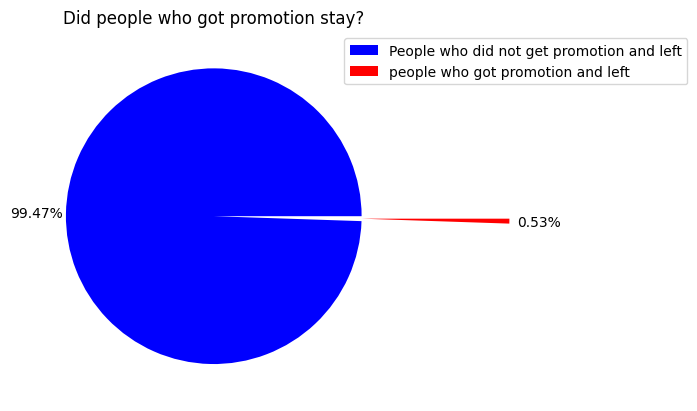

In [166]:
plt.pie(x = data, 
        labels = ['People who did not get promotion and left', 'people who got promotion and left'],
        labeldistance = None,
        autopct='%1.2f%%',
        explode = [0, 1],
        shadow = False,
        colors = ['blue', 'Red'],
        pctdistance=1.2
)
plt.legend( bbox_to_anchor=(0.5, 0.5, 1.3, 0.5))
plt.title('Did people who got promotion stay?')
plt.show()

In [145]:
left = df.groupby(df['left'])

In [156]:
left['promotion_last_5years'].count()/left['promotion_last_5years'].count().sum()

left
0    0.761917
1    0.238083
Name: promotion_last_5years, dtype: float64

In [172]:
salary = df.groupby(df['salary'])

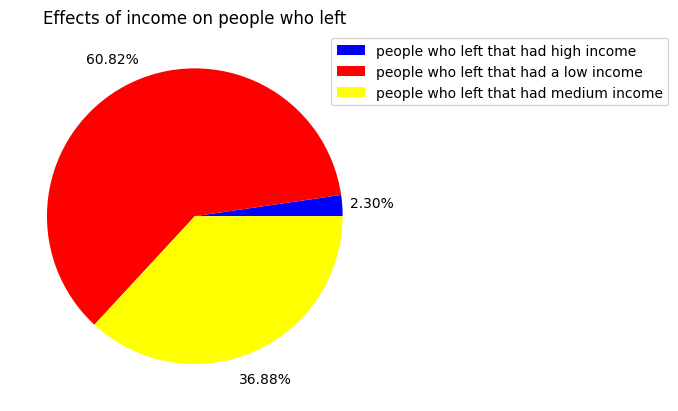

In [187]:
plt.pie(salary['left'].sum(), 
        labels = ['people who left that had high income', 
                 'people who left that had a low income',
                  'people who left that had medium income'
                 ],
        labeldistance = None,
        autopct='%1.2f%%',
        shadow = False,
        colors = ['blue', 'Red', 'yellow'],
        pctdistance=1.2
       )
plt.legend(bbox_to_anchor=(0.5, 0.5, 1.3, 0.5))
plt.title('Effects of income on people who left')
plt.show()

In [180]:
len(df[(df['left'] == 0) & (df['promotion_last_5years'] == 0)])

11128

In [181]:
len(df[(df['left'] == 1) & (df['promotion_last_5years'] == 0)])

3552

In [182]:
len(df[(df['left'] == 0) & (df['promotion_last_5years'] == 1)])

300

In [183]:
len(df[(df['left'] == 1) & (df['promotion_last_5years'] == 1)])

19

In [185]:
s = pd.Series([11128, 3552, 300, 19])

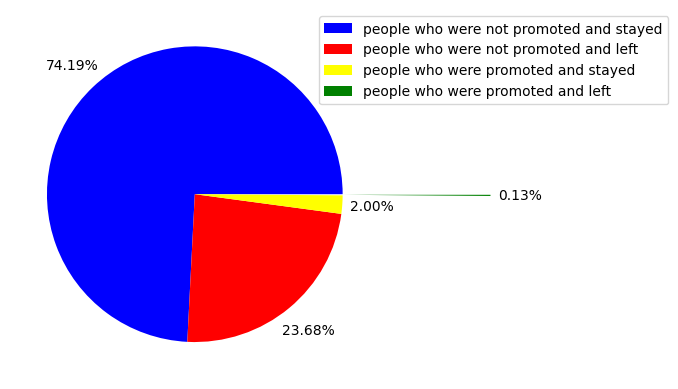

In [191]:
plt.pie(x = s,
        labels = ['people who were not promoted and stayed', 
                 'people who were not promoted and left',
                  'people who were promoted and stayed',
                  'people who were promoted and left'
                 ],
        explode = [0, 0, 0, 1],
        labeldistance = None,
        autopct='%1.2f%%',
        shadow = False,
        colors = ['blue', 'Red', 'yellow', 'green'],
        pctdistance=1.2
       )
plt.legend(bbox_to_anchor=(0.5, 0.5, 1.3, 0.5))
plt.show()

In [193]:
numofprojects = df.groupby(df['number_project'])

In [211]:
x = numofprojects['left'].sum()

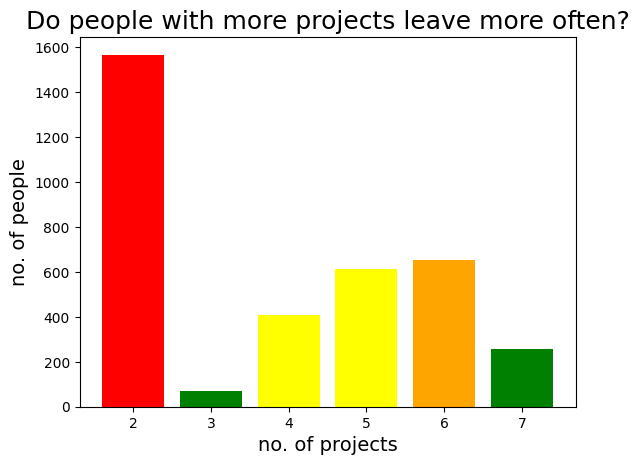

In [213]:
plt.bar(x = x.index, height = x.values, 
        color = ['red', 'green', 'yellow', 'yellow', 'orange', 'green'])
plt.xlabel('no. of projects', fontsize = 14)
plt.ylabel('no. of people', fontsize = 14)
plt.title('Do people with more projects leave more often?', fontsize = 18)
plt.show()

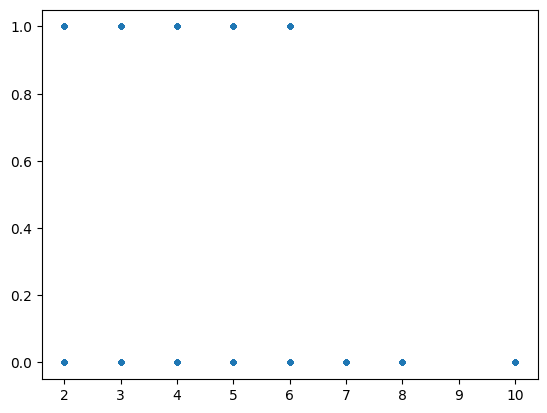

In [287]:
plt.scatter(x = df['time_spend_company'],y=  df['left'], marker = '.')

In [223]:
#dropping values

In [227]:
new_df = df.drop(['satisfaction_level','last_evaluation', 'number_project', 'average_montly_hours',
                 'time_spend_company'], axis = 1)

In [235]:
department_dummies = pd.get_dummies(df['Department']).astype('int64').drop('technical', axis = 1)

In [238]:
salary_dummies = pd.get_dummies(df['salary']).astype('int64').drop('medium', axis = 1)

In [241]:
new_df.drop(['Department', 'salary'], axis = 1, inplace =True)

In [246]:
final_df = pd.concat((new_df, department_dummies, salary_dummies), axis = 1 )

In [249]:
y = final_df.left

In [255]:
final_df.drop(['left'], axis = 1, inplace = True)

In [282]:
X_train, X_test, y_train, y_test = tts(final_df,y,test_size = 0.2)

In [283]:
model1 = linear_model.LogisticRegression()

In [284]:
model1.fit(X_train, y_train)

LogisticRegression()

In [285]:
model1.score(X_test, y_test)

0.767

In [288]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [289]:
left = df.groupby(df['left'])

In [290]:
left['satisfaction_level'].mean()

left
0    0.666810
1    0.440098
Name: satisfaction_level, dtype: float64

In [302]:
left['satisfaction_level'].std()

left
0    0.217104
1    0.263933
Name: satisfaction_level, dtype: float64

In [317]:
left['average_montly_hours'].mean()

left
0    199.060203
1    207.419210
Name: average_montly_hours, dtype: float64

In [322]:
left['average_montly_hours'].std()

left
0    45.682731
1    61.202825
Name: average_montly_hours, dtype: float64

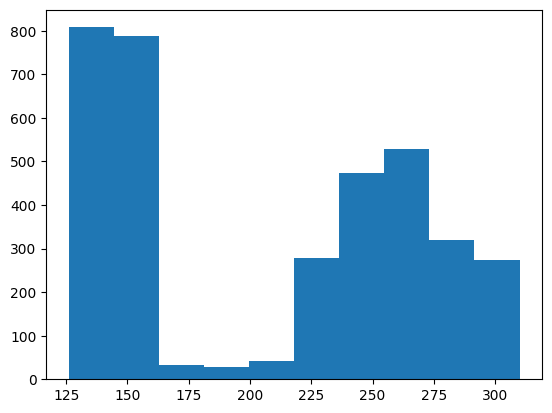

In [337]:
plt.hist(df.loc[(df['left'] == 1, 'average_montly_hours')])
plt.show()

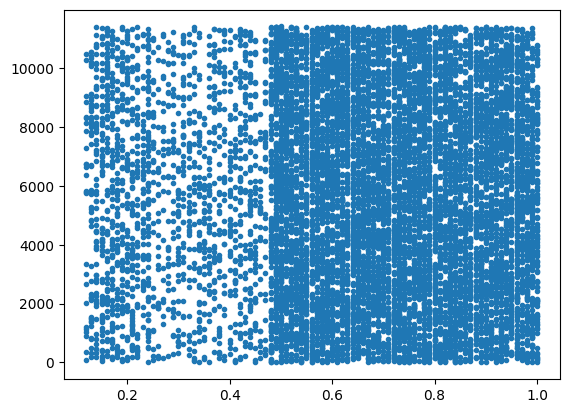

In [346]:
plt.scatter(df.loc[(df['left'] == 0, 'satisfaction_level')], y = range(len(df.loc[(df['left'] == 0, 'satisfaction_level')])),marker = '.')

In [321]:
len(df[(df['left'] == 0) & (df['Work_accident'] == 0)])

9428

In [293]:
len(df[(df['left'] == 0) & (df['Work_accident'] == 1)])

2000

In [294]:
len(df[(df['left'] == 1) & (df['Work_accident'] == 0)])

3402

In [295]:
len(df[(df['left'] == 1) & (df['Work_accident'] == 1)])

169

In [297]:
d = np.array([len(df[(df['left'] == 0) & (df['Work_accident'] == 0)]), len(df[(df['left'] == 0) & (df['Work_accident'] == 1)]),
         len(df[(df['left'] == 1) & (df['Work_accident'] == 0)]), len(df[(df['left'] == 1) & (df['Work_accident'] == 1)])])

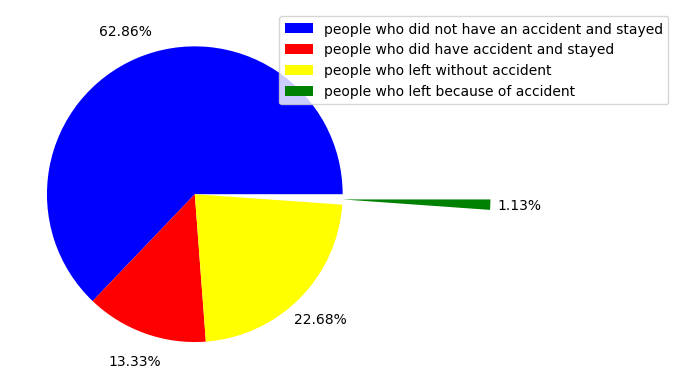

In [298]:
plt.pie(x = d,
        labels = ['people who did not have an accident and stayed', 
                 'people who did have accident and stayed',
                  'people who left without accident',
                  'people who left because of accident'
                 ],
        explode = [0, 0, 0, 1],
        labeldistance = None,
        autopct='%1.2f%%',
        shadow = False,
        colors = ['blue', 'Red', 'yellow', 'green'],
        pctdistance=1.2
       )
plt.legend(bbox_to_anchor=(0.5, 0.5, 1.3, 0.5))
plt.show()

In [299]:
new_df = df.drop(['last_evaluation', 'number_project', 'Work_accident'], axis = 1)

In [351]:
new_df

,satisfaction_level,average_montly_hours,time_spend_company,left,promotion_last_5years,Department,salary
0,0.38,157,3,1,0,sales,low
1,0.80,262,6,1,0,sales,medium
2,0.11,272,4,1,0,sales,medium
3,0.72,223,5,1,0,sales,low
4,0.37,159,3,1,0,sales,low
...,...,...,...,...,...,...,...
14994,0.40,151,3,1,0,support,low
14995,0.37,160,3,1,0,support,low
14996,0.37,143,3,1,0,support,low
14997,0.11,280,4,1,0,support,low


In [347]:
department_dummies = pd.get_dummies(df['Department']).astype('int64').drop('technical', axis = 1)

In [348]:
salary_dummies = pd.get_dummies(df['salary']).astype('int64').drop('medium', axis = 1)

In [352]:
new_df.drop(['Department', 'salary'], axis = 1, inplace =True)

In [354]:
y = new_df.left

In [356]:
final_df = pd.concat((new_df, department_dummies, salary_dummies), axis = 1 )

In [426]:
X_train, X_test, y_train, y_test = tts(final_df,y,test_size = 0.2)

In [427]:
model2 = linear_model.LogisticRegression(solver='lbfgs', max_iter=100)

In [428]:
model2.fit(X_train, y_train)

LogisticRegression()

In [429]:
model2.score(X_test, y_test)

1.0

In [430]:
y_pred = model2.predict(X_test)

In [431]:
from sklearn import metrics

# Assuming 'y_test' is the true labels and 'y_pred' is the predicted labels

# Confusion Matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

# Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Precision, Recall, and F1-Score
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1_score:.2f}')

# Classification Report
classification_rep = metrics.classification_report(y_test, y_pred)
print('Classification Report:\n', classification_rep)

Confusion Matrix:
 [[2292    0]
 [   0  708]]
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2292
           1       1.00      1.00      1.00       708

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



In [ ]:
##**Satisfaction Level**
##**Average Monthly Hours**
##**Promotion Last 5 Years**
##**Salary**

In [433]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [435]:
new_df = df.drop(['last_evaluation', 'number_project', 'time_spend_company','Work_accident', 'Department' ], axis = 1)

In [437]:
new_df.head()

,satisfaction_level,average_montly_hours,left,promotion_last_5years,salary
0,0.38,157,1,0,low
1,0.80,262,1,0,medium
2,0.11,272,1,0,medium
3,0.72,223,1,0,low
4,0.37,159,1,0,low


In [441]:
salary_dummies = pd.get_dummies(new_df['salary']).astype('int64')

In [444]:
new_df.drop('salary', axis = 1, inplace = True)

In [447]:
final_df = pd.concat((new_df, salary_dummies), axis = 1)

In [449]:
y = final_df.left

In [451]:
final_df.drop('left', axis = 1, inplace =True)

In [454]:
final_df.drop('medium', axis = 1, inplace = True)

In [456]:
X= final_df

In [458]:
X_train, X_test, y_train, y_test =  tts(X, y, test_size = 0.25)

In [459]:
model3 = linear_model.LogisticRegression()

In [460]:
model3.fit(X_train, y_train)

LogisticRegression()

In [461]:
model3.score(X_test, y_test)

0.7696

In [462]:
y_pred = model3.predict(X_test)

In [463]:
from sklearn import metrics

# Assuming 'y_test' is the true labels and 'y_pred' is the predicted labels

# Confusion Matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

# Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Precision, Recall, and F1-Score
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1_score:.2f}')

# Classification Report
classification_rep = metrics.classification_report(y_test, y_pred)
print('Classification Report:\n', classification_rep)

Confusion Matrix:
 [[2645  189]
 [ 675  241]]
Accuracy: 0.77
Precision: 0.56
Recall: 0.26
F1-Score: 0.36
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.93      0.86      2834
           1       0.56      0.26      0.36       916

    accuracy                           0.77      3750
   macro avg       0.68      0.60      0.61      3750
weighted avg       0.74      0.77      0.74      3750

